In [114]:
import numpy as np
import pandas as pd
import pickle

In [88]:
train_set = pd.read_csv('data/train.csv', skiprows = 1, header = None)
test_set = pd.read_csv('data/test.csv',
                      skiprows = 1, header = None) # Make sure to skip a row for the test set
# original train_set and test_set
# http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data    # no skiprows
# http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

In [89]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [90]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [74]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
col_labels2 = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country']

In [92]:
train_set.columns = col_labels

In [93]:
test_set.columns = col_labels2 #########

In [122]:
'''train_set.info()'''

'train_set.info()'

In [123]:
'''test_set.info()'''

'test_set.info()'

In [124]:
'''train_set.replace(' ?', np.nan).dropna().shape '''

"train_set.replace(' ?', np.nan).dropna().shape "

In [125]:
'''test_set = test_set.replace(' ?', np.nan).dropna()
test_set.shape'''

"test_set = test_set.replace(' ?', np.nan).dropna()\ntest_set.shape"

In [126]:
'''train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()'''

"train_nomissing = train_set.replace(' ?', np.nan).dropna()\ntest_nomissing = test_set.replace(' ?', np.nan).dropna()"

In [127]:
'''test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})'''

"test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})"

In [128]:
'''test_nomissing.wage_class.unique()'''

'test_nomissing.wage_class.unique()'

In [94]:
# train_nomissing.wage_class.unique()
train_set.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [129]:
'''combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0)'''

'combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0)'

In [130]:
'''combined_set.info()'''

'combined_set.info()'

In [17]:
'''for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer'''

In [131]:
'''combined_set.info()'''

'combined_set.info()'

In [132]:
'''final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row'''

'final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row\nfinal_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row'

In [97]:
for feature in train_set.columns: # Loop through all columns in the dataframe
    if train_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        train_set[feature] = pd.Categorical(train_set[feature]).codes # Replace strings with an integer

for feature in test_set.columns: # Loop through all columns in the dataframe
    if test_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        test_set[feature] = pd.Categorical(test_set[feature]).codes # Replace strings with an integer
print(train_set.shape)
print(test_set.shape)

(32561, 15)
(16281, 14)


In [96]:
final_test = test_set
final_train = train_set

In [98]:
y_train = final_train.pop('wage_class')
# y_test = final_test.pop('wage_class')

In [100]:
print(train_set.shape)
print(y_train.shape)

(32561, 14)
(32561,)


## first grid search

In [21]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [121]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
optimized_GBM.fit(final_train, y_train)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x10f737748>>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/xgboost-0.6-py3.6.egg/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [133]:
optimized_GBM.grid_scores_
#'max_depth': 3, 'min_child_weight': 1

[mean: 0.87073, std: 0.00241, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.87061, std: 0.00235, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86966, std: 0.00319, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86597, std: 0.00212, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86558, std: 0.00196, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86530, std: 0.00201, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85983, std: 0.00170, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.86164, std: 0.00267, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.86094, std: 0.00315, params: {'max_depth': 7, 'min_child_weight': 5}]

## second grid search

In [134]:
cv_params = {'learning_rate': [0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
ind_params = {'n_estimators': 1000, 'seed':0, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth': 3, 'min_child_weight': 1}


optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.01], 'subsample': [0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [135]:
optimized_GBM.grid_scores_
# learning_rate' (eta): 0.1, 'subsample': 0.9

[mean: 0.86984, std: 0.00212, params: {'learning_rate': 0.1, 'subsample': 0.7},
 mean: 0.87073, std: 0.00241, params: {'learning_rate': 0.1, 'subsample': 0.8},
 mean: 0.87104, std: 0.00240, params: {'learning_rate': 0.1, 'subsample': 0.9},
 mean: 0.86413, std: 0.00293, params: {'learning_rate': 0.01, 'subsample': 0.7},
 mean: 0.86407, std: 0.00256, params: {'learning_rate': 0.01, 'subsample': 0.8},
 mean: 0.86373, std: 0.00253, params: {'learning_rate': 0.01, 'subsample': 0.9}]

In [136]:
xgdmat = xgb.DMatrix(final_train, y_train)

In [137]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.9, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5,
                metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error

In [138]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
432,0.127115,0.004615,0.115583,0.001795
433,0.127115,0.004551,0.115552,0.001835
434,0.127115,0.004537,0.115568,0.001860
435,0.127054,0.004630,0.115506,0.001862
436,0.126931,0.004578,0.115552,0.001930


In [139]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.9, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 436)

## save model if it performs better than previous one

In [115]:
# final_gb.save_model('xgboost.model')
with open('xgboost_model.pickle', 'wb') as handle:
    pickle.dump(final_gb, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [105]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

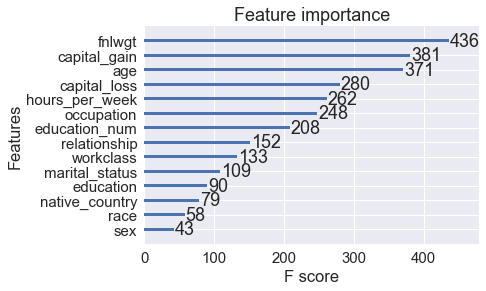

In [143]:
xgb.plot_importance(final_gb)

In [107]:
testdmat = xgb.DMatrix(final_test)

In [140]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([ 0.00259245,  0.19287379,  0.27066565, ...,  0.78985763,
        0.22280334,  0.76670092], dtype=float32)

In [141]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([ 0.,  0.,  0., ...,  1.,  0.,  1.], dtype=float32)

In [142]:
import csv
with open('data/submission_XGBoostnew.csv', 'wt') as outfile:
    test_writer = csv.writer(outfile)
    test_writer.writerow(['id','label'])
    
    counter = 0
    for num in y_pred:
        counter += 1
        test_writer.writerow([str(counter),int(num)])
    
print('done!')

done!


In [41]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)
# 432: 0.86985391766268261
# 379: 0.87025232403718455

(0.87025232403718455, 0.12974767596281545)